# Выявить определяющие успешность игры закономерности

Шаг 1. Открыть файл с данными и изучить общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

Шаг 2. Подготовьте данные
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;

Обработать пропуски при необходимости:
- Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
- Описать причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.

Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Шаг 6. Общий вывод
Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

## Открыть файл с данными и изучить общую информацию

In [1]:
import pandas as pd
import math
import numpy as np

df = pd.read_csv('/datasets/games.csv')
df.tail(50)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16665,Sweet Honey Coming,PS2,2009.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16666,Psychic Detective,PS,1995.0,Adventure,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16667,Hanasaku Manimani,PSV,2014.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16669,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.00,0.0,72.0,tbd,T
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16671,Kanokon: Esuii,PS2,2008.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016.0,Action,0.01,0.00,0.00,0.0,NaN,tbd,M
16673,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,0.01,0.00,0.00,0.0,81.0,8.8,M
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN


In [2]:
!pip install -U seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)


<module 'seaborn' from '/home/jovyan/.local/lib/python3.7/site-packages/seaborn/__init__.py'>

In [3]:
import warnings
warnings.simplefilter('ignore')

Открываем файл, и смотрим на первые 20 строчек датасета.

In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Просматриваем файл функцией discrabe, которая сразу выдает основные числовые параметры.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Просматриваем типы данных для каждого столбца.

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Просматриваем какие есть пропуски в столбцах.

Проверяем есть ли дубликаты.

##   Подготовьте данные

In [7]:
df.columns = map(str.lower, df.columns)

Меняем все буквы в названиях столбцов на строчные.

In [8]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')

Меняем пропуски в столбце год выпуска игры на 0. Считаем что 0 либо год не указан либо не известен. Года меняем на целое число.

In [9]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df['critic_score'] = df['critic_score'].fillna(-10)
df['critic_score'] = df['critic_score'].astype('int')


Меняем пропуски в столбце оценки критиков на заглушку -10. Округляем до целого числа, так как оченки выставляются целыми числами.

In [11]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)
df['user_score'] = df['user_score'].fillna(-100) 


In [12]:
df['user_score'] = df['user_score'].fillna(-100) 
df['rating'] = df['rating'].fillna('no_rating') 
df['rating'].value_counts()

no_rating    6766
E            3990
T            2961
M            1563
E10+         1420
EC              8
RP              3
K-A             3
AO              1
Name: rating, dtype: int64

Мняем в столбце оценок игроков пропуски на заглушку no_rating. tbd - это значение которое будет определено в будующем. Заменяем его пропусками.

В столбце рейтинг от организации ESRB пропуски нти игры не оценены этой оргинизацией либо выпущены до 1994 года(год основания организации ESRB).

In [13]:
df.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [14]:
df = df.dropna(subset = ['genre'])

In [15]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [16]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,-100,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,-100,no_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10,-100,no_rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-10,-100,no_rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-100,no_rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-10,-100,no_rating


Удвляем строки где отсутвует название жанра. Удалилось всего две строки где отсутвовали и названия игр.

In [17]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,-100,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,-100,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-10,-100,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-10,-100,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-100,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-10,-100,no_rating,0.01


In [19]:
df['user_score'] = df['user_score'].astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
sum_sales          16713 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB


Сделали столбец с общей суммой продаж всех регионов.

##  Проводим исследовательский анализ данных

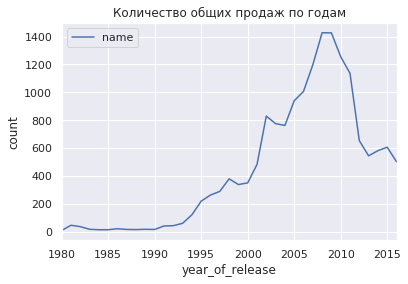

In [21]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').query('year_of_release != 0').plot()
plt.title('Количество общих продаж по годам')
plt.ylabel('count')
plt.show()

До 1994 года выпускалось достаточно мало игр в год. 

In [22]:
df.pivot_table(index =['platform','year_of_release'], values = 'sum_sales', aggfunc = 'sum').tail(60)

sum_sales
platform year_of_release           
SCD      1993                  1.50
         1994                  0.36
SNES     1990                 26.15
         1991                 16.22
         1992                 32.98
         1993                 40.02
         1994                 35.08
         1995                 32.20
         1996                 15.92
         1997                  0.99
         1998                  0.22
         1999                  0.26
TG16     1995                  0.16
WS       1999                  0.46
         2000                  0.68
         2001                  0.28
Wii      0                    16.33
         2006                137.15
         2007                152.77
         2008                171.32
         2009                206.97
         2010                127.95
         2011                 59.65
         2012                 21.71
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2012                 17.56
         2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     0                    10.18
         2005                  8.25
         2006                 51.62
         2007                 95.41
         2008                135.26
         2009                120.29
         2010                170.03
         2011                143.84
         2012                 99.74
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XB       0                     6.17
         2000                  0.99
         2001                 22.26
         2002                 48.01
         2003                 55.04
         2004                 65.42
         2005                 49.08
         2006                 10.04
         2007                  0.55
         2008                  0.18
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

В частом случае хорошая платформа живет около 10 лет. По показателя продаж видно что самые продажи происходят на 3-6 год после появдения платформы.

Считаю что самое оптимальное учитывать игры с 2013 года.

In [23]:
df1 = df.query('year_of_release >= 2013 or year_of_release == 0')

In [24]:
df1.pivot_table(index =['platform','year_of_release'], values = 'sum_sales', aggfunc = 'sum')

sum_sales
platform year_of_release           
2600     0                    10.50
3DS      0                     1.19
         2013                 56.57
         2014                 43.76
         2015                 27.78
         2016                 15.14
DS       0                     3.34
         2013                  1.54
GB       0                     1.03
GBA      0                     4.97
GC       0                     2.20
N64      0                     0.67
PC       0                     3.76
         2013                 12.38
         2014                 13.28
         2015                  8.52
         2016                  5.25
PS       0                     3.28
PS2      0                    22.21
PS3      0                     8.31
         2013                113.25
         2014                 47.76
         2015                 16.82
         2016                  3.60
PS4      2013                 25.99
         2014                100.00
         2015                118.90
         2016                 69.25
PSP      0                     4.52
         2013                  3.14
         2014                  0.24
         2015                  0.12
PSV      0                     0.26
         2013                 10.59
         2014                 11.90
         2015                  6.25
         2016                  4.25
Wii      0                    16.33
         2013                  8.59
         2014                  3.75
         2015                  1.14
         2016                  0.18
WiiU     2013                 21.65
         2014                 22.03
         2015                 16.35
         2016                  4.60
X360     0                    10.18
         2013                 88.58
         2014                 34.74
         2015                 11.96
         2016                  1.52
XB       0                     6.17
XOne     2013                 18.96
         2014                 54.07
         2015                 60.14
         2016                 26.15

Перспективные платформы: 3DS, PC, PS4, PSV, WiiU, XOne.

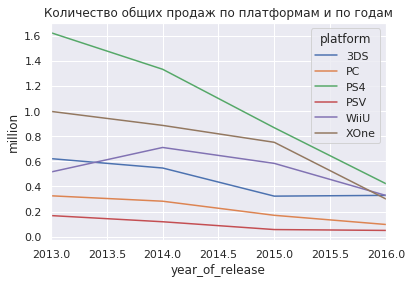

In [25]:
top = ['3DS','PC', 'PS4','PSV', 'WiiU', 'XOne']
df2 = df1.query('platform == @top and year_of_release > 0')
df2.pivot_table(columns = 'platform', index = 'year_of_release', values = 'sum_sales').plot()
plt.title('Количество общих продаж по платформам и по годам')
plt.ylabel('million')
plt.show()

In [26]:
df2['platform'].value_counts()

PS4     392
PSV     358
3DS     303
XOne    247
PC      189
WiiU    115
Name: platform, dtype: int64

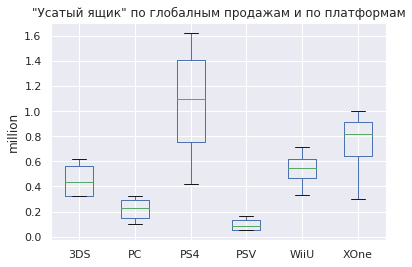

In [27]:
df2.pivot_table(columns = 'platform', index = 'year_of_release', values = 'sum_sales').plot.box()
plt.title('"Усатый ящик" по глобалным продажам и по платформам')
plt.ylabel('million')
plt.show()

Самая перспективная алвтформа это PS4.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


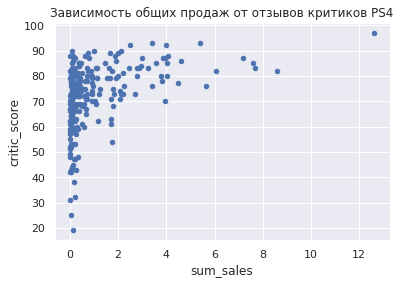

In [57]:
df2.query('platform == "PS4" and critic_score != -10').plot(x='sum_sales', y='critic_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов критиков PS4')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


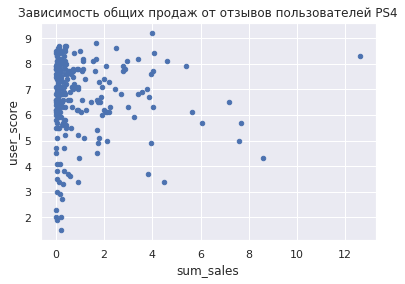

In [29]:
df2.query('platform == "PS4" and user_score != -100').plot(x='sum_sales', y='user_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов пользователей PS4')
plt.show()

От оценки экспертов зависият продажи больше чем от оценок пользователей.

In [30]:
df2.query('platform == "PS4" and user_score != -100 and critic_score != -10').corr(method ='pearson')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.261760,-0.191355,-0.122830,-0.232177,-0.019983,0.150315,-0.234400
na_sales,-0.261760,1.000000,0.714988,0.530480,0.915292,0.414241,-0.022577,0.893807
eu_sales,-0.191355,0.714988,1.000000,0.519826,0.935136,0.346044,-0.050671,0.951656
jp_sales,-0.122830,0.530480,0.519826,1.000000,0.566734,0.322057,0.174512,0.592214
other_sales,-0.232177,0.915292,0.935136,0.566734,1.000000,0.408465,-0.037332,0.997798
critic_score,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,0.150315,-0.022577,-0.050671,0.174512,-0.037332,0.557654,1.000000,-0.033625
sum_sales,-0.234400,0.893807,0.951656,0.592214,0.997798,0.405895,-0.033625,1.000000


Для PS4 зависимость оценки критикрв и продаж стоставляет 0.4. Отзыв эксперта решает больше.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


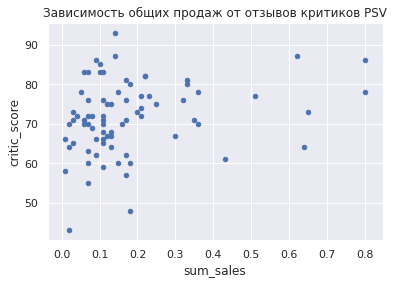

In [31]:
df2.query('platform == "PSV" and critic_score != -10').plot(x='sum_sales', y='critic_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов критиков PSV')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


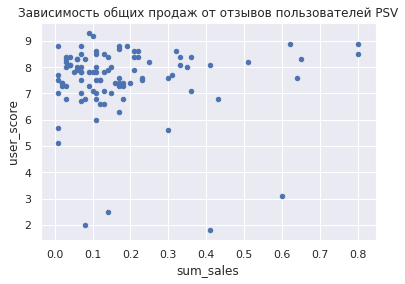

In [32]:
df2.query('platform == "PSV" and user_score != -100').plot(x='sum_sales', y='user_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов пользователей PSV')
plt.show()

In [33]:
df2.query('platform == "PSV" and user_score != -100 and critic_score != -10').corr(method ='pearson')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.374415,-0.270614,-0.054588,-0.340779,0.127863,0.166081,-0.325350
na_sales,-0.374415,1.000000,0.648733,0.112997,0.898539,0.097585,0.164488,0.822975
eu_sales,-0.270614,0.648733,1.000000,0.038520,0.908095,0.275317,0.271400,0.811642
jp_sales,-0.054588,0.112997,0.038520,1.000000,0.067262,0.165953,0.128654,0.507946
other_sales,-0.340779,0.898539,0.908095,0.067262,1.000000,0.197440,0.231261,0.890923
critic_score,0.127863,0.097585,0.275317,0.165953,0.197440,1.000000,0.611521,0.254100
user_score,0.166081,0.164488,0.271400,0.128654,0.231261,0.611521,1.000000,0.265478
sum_sales,-0.325350,0.822975,0.811642,0.507946,0.890923,0.254100,0.265478,1.000000


У платформы PSV зависимость отзывов пользователей и экспертов почти одинакова 0.25 и 0.26

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


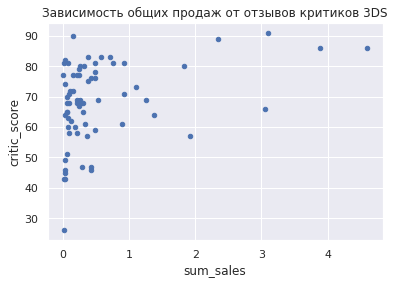

In [34]:
df2.query('platform == "3DS" and critic_score != -10').plot(x='sum_sales', y='critic_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов критиков 3DS')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


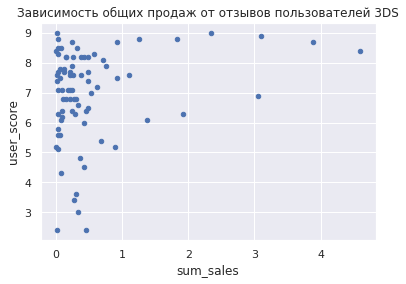

In [35]:
df2.query('platform == "3DS" and user_score != -100').plot(x='sum_sales', y='user_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов пользователей 3DS')
plt.show()

In [36]:
df2.query('platform == "3DS" and user_score != -100 and critic_score != -10').corr(method ='pearson')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.203256,-0.225719,-0.102393,-0.211240,0.157359,0.157464,-0.193118
na_sales,-0.203256,1.000000,0.884865,0.562605,0.988644,0.352655,0.280116,0.906798
eu_sales,-0.225719,0.884865,1.000000,0.623985,0.940184,0.254784,0.184515,0.922901
jp_sales,-0.102393,0.562605,0.623985,1.000000,0.593697,0.284584,0.247439,0.840218
other_sales,-0.211240,0.988644,0.940184,0.593697,1.000000,0.337180,0.260898,0.932745
critic_score,0.157359,0.352655,0.254784,0.284584,0.337180,1.000000,0.769536,0.339235
user_score,0.157464,0.280116,0.184515,0.247439,0.260898,0.769536,1.000000,0.272990
sum_sales,-0.193118,0.906798,0.922901,0.840218,0.932745,0.339235,0.272990,1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


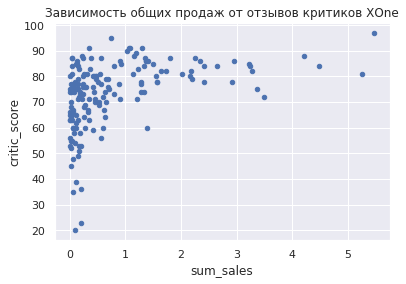

In [37]:
df2.query('platform == "XOne" and critic_score != -10').plot(x='sum_sales', y='critic_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов критиков XOne')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


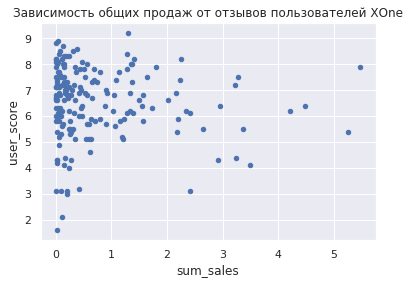

In [38]:
df2.query('platform == "XOne" and user_score != -100').plot(x='sum_sales', y='user_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов пользователей XOne')
plt.show()

In [39]:
df2.query('platform == "XOne" and user_score != -100 and critic_score != -10').corr(method ='pearson')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.262722,-0.194533,-0.144318,-0.263305,0.072812,0.117074,-0.257674
na_sales,-0.262722,1.000000,0.683604,0.400585,0.982840,0.381859,-0.094047,0.956913
eu_sales,-0.194533,0.683604,1.000000,0.381617,0.804073,0.373454,-0.075822,0.866036
jp_sales,-0.144318,0.400585,0.381617,1.000000,0.419054,0.199978,0.071915,0.430736
other_sales,-0.263305,0.982840,0.804073,0.419054,1.000000,0.404996,-0.095963,0.993180
critic_score,0.072812,0.381859,0.373454,0.199978,0.404996,1.000000,0.472462,0.410422
user_score,0.117074,-0.094047,-0.075822,0.071915,-0.095963,0.472462,1.000000,-0.094003
sum_sales,-0.257674,0.956913,0.866036,0.430736,0.993180,0.410422,-0.094003,1.000000


Зависимость оценки критика составляет 0.41 а пользователей -0.094. Результаты похожи с платформой PS4.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


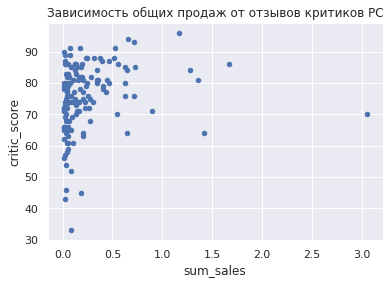

In [40]:
df2.query('platform == "PC" and critic_score != -10').plot(x='sum_sales', y='critic_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов критиков PC')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


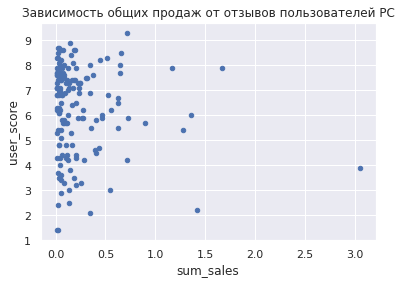

In [41]:
df2.query('platform == "PC" and user_score != -100').plot(x='sum_sales', y='user_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов пользователей PC')
plt.show()

In [42]:
df2.query('platform == "PC" and user_score != -100 and critic_score != -10').corr(method ='pearson')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.204423,-0.245596,NaN,-0.261848,0.071885,0.032798,-0.241890
na_sales,-0.204423,1.000000,0.833156,NaN,0.950696,0.185838,-0.067004,0.939313
eu_sales,-0.245596,0.833156,1.000000,NaN,0.914786,0.188020,-0.125405,0.972033
jp_sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
other_sales,-0.261848,0.950696,0.914786,NaN,1.000000,0.178589,-0.128392,0.973090
critic_score,0.071885,0.185838,0.188020,NaN,0.178589,1.000000,0.429562,0.194124
user_score,0.032798,-0.067004,-0.125405,NaN,-0.128392,0.429562,1.000000,-0.109235
sum_sales,-0.241890,0.939313,0.972033,NaN,0.973090,0.194124,-0.109235,1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


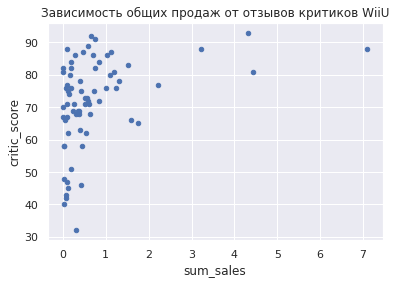

In [43]:
df2.query('platform == "WiiU" and critic_score != -10').plot(x='sum_sales', y='critic_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов критиков WiiU')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


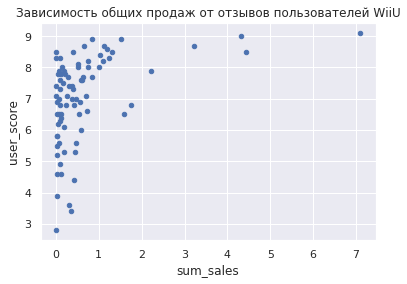

In [44]:
df2.query('platform == "WiiU" and user_score != -100').plot(x='sum_sales', y='user_score', kind ='scatter', grid =True)
plt.title('Зависимость общих продаж от отзывов пользователей WiiU')
plt.show()

In [45]:
df2.query('platform == "WiiU" and user_score != -100 and critic_score != -10').corr(method ='pearson')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.033025,-0.026782,0.024670,-0.019280,-0.024517,0.012796,-0.017480
na_sales,-0.033025,1.000000,0.972678,0.810899,0.997533,0.391375,0.400063,0.981238
eu_sales,-0.026782,0.972678,1.000000,0.871059,0.982232,0.400942,0.427320,0.990846
jp_sales,0.024670,0.810899,0.871059,1.000000,0.824918,0.271889,0.340842,0.903467
other_sales,-0.019280,0.997533,0.982232,0.824918,1.000000,0.398232,0.413955,0.986512
critic_score,-0.024517,0.391375,0.400942,0.271889,0.398232,1.000000,0.721313,0.379504
user_score,0.012796,0.400063,0.427320,0.340842,0.413955,0.721313,1.000000,0.408692
sum_sales,-0.017480,0.981238,0.990846,0.903467,0.986512,0.379504,0.408692,1.000000


Чаще всего оценка критика влияет больше чем оценки пользователей. У единственной платформы WiiU корреляция оценки пользователей немного выше чем критиков.

In [46]:
df2.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = ['sum', 'count', 'mean', 'median'])

,sum,count,mean,median
,sum_sales,sum_sales,sum_sales,sum_sales
genre,,,,
Action,199.18,568,0.350669,0.090
Adventure,16.48,169,0.097515,0.030
Fighting,26.69,48,0.556042,0.120
Misc,34.66,112,0.309464,0.105
Platform,34.22,55,0.622182,0.240
Puzzle,3.13,16,0.195625,0.065
Racing,30.36,60,0.506000,0.100
Role-Playing,123.94,228,0.543596,0.120


Жанр игр приносящих больше всего прибыли это Action, Shooter, Role - Playing. Самый низкий доход у Pazzle. Самое большое количество продаж у Action, но вот среднее и медианное значение достаточно маленькие. Берёт количеством. А вот у Shooter количество всего 122 а вот медианное и среднее значение самое большое.

## Составить портрет пользователя каждого региона

In [47]:
df2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10,-100.0,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-10,-100.0,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-10,-100.0,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,-10,-100.0,no_rating,0.01
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-100.0,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-10,-100.0,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-10,-100.0,no_rating,0.01


In [48]:
df2.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales' , 'sum_sales'], aggfunc = 'sum')

,eu_sales,jp_sales,na_sales,sum_sales
platform,,,,
3DS,30.96,67.81,38.20,143.25
PC,25.36,0.00,11.11,39.43
PS4,141.09,15.96,108.74,314.14
PSV,6.10,18.59,5.04,32.99
WiiU,19.85,10.88,29.21,64.63
XOne,51.59,0.34,93.12,159.32


В европпе самая попоулярная платформа это PS4, и вообще у евроопы самые большие выручки. В японии же популярны портативная приставка 3DS(японская комания), но вообще не пользуются спросом PC и XOne. В северной Америке любят играть как на своих приставках XOne, так и на японских PS4 и 3DS.

In [49]:
df2.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales' , 'sum_sales'], aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)

,eu_sales,jp_sales,na_sales,sum_sales
genre,,,,
Role-Playing,32.00,44.84,37.92,123.94
Action,73.96,29.87,73.43,199.18
Misc,10.61,8.27,12.69,34.66
Fighting,6.58,5.33,12.10,26.69
Platform,12.16,4.75,14.18,34.22
Shooter,64.89,4.56,75.37,165.71
Adventure,5.88,4.37,4.57,16.48
Simulation,10.17,4.29,4.08,19.81
Sports,38.63,3.05,37.09,90.67


Как в европпе так и в северной Америке самые популярные игры это Action, Shooter, Role - Playing, Sports, Siulator.
В японии же ситуация отличается и самый популярный жанр это Role-Playing. 

In [50]:
df2.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales' , 'sum_sales'], aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False)

,eu_sales,jp_sales,na_sales,sum_sales
rating,,,,
no_rating,63.54,72.97,68.68,223.33
T,32.60,13.52,35.07,91.67
E,58.00,13.26,52.37,138.39
M,94.51,8.17,97.05,228.45
E10+,26.30,5.66,32.25,71.92


M - Mature. Игры с элементами насилия, кровью, черным юмором и крепкими выражениями. Возрастной ценз — 17 и более лет.
E - Everyone. Рассчитано на игроков от 6 лет и старше.
E10+ - Everyone 10+. Для детей от 10 лет и старше. Такие игры могут содержать элементы Cartoon Violence (мультяшной жестокости).
T - Teen. Реалистичное насилие и грубая лексика, но в небольших количествах. Для игроков от 13 лет.
EC - Early Childhood. Игра разрешена детям от 3 лет и старше.
RP - Rating Pending. Данная иконка подтверждает, что игра уже принята на рассмотрение в ESRB, но итоговый рейтинг получить еще не успела.

Самые попоулярные катигории в Европе и северной Америке это M, E, T. В японии же игры Everyone. 
В детские игры с 3х лет играют мало. 
Игры с еще не установленным рейтингом, их потчи таких нет.

## Проверьте гипотезы

In [51]:
from scipy import stats as st

sample1= df2.query('platform == "XOne" and user_score != -100')['user_score']
sample2= df2.query('platform == "PC" and user_score != -100')['user_score']

print('H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
print('H1:Средние пользовательские рейтинги платформ Xbox One и PC различаются')

alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу H0')
else:
    print('Не получилось отвергнуть нулевую гипотезу H0') 

H0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1:Средние пользовательские рейтинги платформ Xbox One и PC различаются
p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу H0


In [52]:
sample3= df2.query('genre == "Action" and user_score != -100')['user_score']
sample4= df2.query('genre == "Sports" and user_score != -100')['user_score']

print('H0:Средние пользовательские рейтинги жанров Action  и Sports одинаковые')
print('H1:Средние пользовательские рейтинги жанров Action  и Sports разные')


alpha = 0.05
results1 = st.ttest_ind(sample3, sample4, equal_var = False)

print('p-значение:', results1.pvalue)

if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу H0')
else:
    print('Не получилось отвергнуть нулевую гипотезу H0') 

H0:Средние пользовательские рейтинги жанров Action  и Sports одинаковые
H1:Средние пользовательские рейтинги жанров Action  и Sports разные
p-значение: 1.2678091455806196e-11
Отвергаем нулевую гипотезу H0


Для проверки гипотез про пользовательский рейтинг платформ и жанров, мы выбираем методом "О равенстве среднего двух генеральных совокупностей по взятым из них выборкам", так как выборки не зависимы. Параметр equal_var = False потому что дисперсии выборок не равны. Альфу берем стандартную равную 0.05 это обозначает критическую область с каждой стороны по 2.5%.
Нулевая гипотеза всегда проверяет равенство выборок (oтличий нет), а альтернативная отрицает нулевую (когда отличия есть).

## Напишите общий вывод

Мы определили что не стоит смотреть игры всех годов, а сделать выборку из 4х последних лет. Перспективные платформы это: 3DS, PC, PS4, PSV, WiiU, XOne. А самая прибыльная платформа это PS4. Чаще всего оценки экспертов влияют на продажи. Жанр игр приносящих больше всего прибыли это Action, Shooter, Role - Playing. Самый низкий доход у Pazzle. В европпе самая попоулярная платформа это PS4, и вообще у евроопы самые большие выручки. В японии же популярны портативная приставка 3DS(японская комания), но вообще не пользуются спросом PC и XOne. В северной Америке любят играть как на своих приставках XOne, так и на японских PS4 и 3DS. Как в европпе так и в северной Америке самые популярные игры это Action, Shooter, Role - Playing, Sports, Siulator.
В японии же ситуация отличается и самый популярный жанр это Role-Playing. 
Самые попоулярные катигории в Европе и северной Америке это M, E, T. В японии же игры Everyone. 
В детские игры с 3х лет играют мало. 
Игры с еще не установленным рейтингом, их потчи таких нет.

Проверили 2 гипотезы и поняли что:
1. Средние пользовательские рейтинги платформ Xbox One и PC различаются
2. Средние пользовательские рейтинги жанров Action  и Sports разные